In [1]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
results = [1]*35+[0]*14

In [ ]:
# 2개의 리스트를 1개로 묶는 작업
datas = [[l,w,r]for l,w,r in zip(length,weight,results)]
df = pd.DataFrame(datas)
df

In [ ]:
datas = df.iloc[:,0:2]
datas 

results = df.iloc[:,2]
results

In [39]:
from sklearn.model_selection import train_test_split
# random_state=42 훈련세트, 테스트세트가 할때마다 섞이지 않도록 해줌.
# stratify: 설정데이터를 가지고 랜덤으로 데이터를 섞어줌.
train_input,test_input,train_target,test_target = train_test_split(
    datas,results,stratify=results
)

train_input

,0,1
10,31.0,475.0
0,25.4,242.0
45,12.4,13.4
37,10.6,7.0
44,12.2,12.2
17,33.0,700.0
12,31.5,500.0
48,15.0,19.9
4,29.0,430.0
31,38.5,955.0


In [40]:
# 1. 데이터 전처리 = Nan, 0, 타입, 표준화작업, 훈련세트, 테스트세트 구성
# 2. 데이터 학습시키기
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)
# 3. 데이터 예측하기
predict = clf.predict(test_input)
predict

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [41]:
# 4. 정확도 측정
score = clf.score(test_input,test_target)
print("정답률 : ",score)

정답률 :  1.0


In [42]:
# 실험 데이터로 확인
pre = clf.predict([[30,600]])
print("데이터 예측결과 : ",pre)

데이터 예측결과 :  [1]


In [49]:
# 25,150의 데이터는 knn판별할때 이웃하는 데이터는 indexes
dfistances,indexes = clf.kneighbors([[25,150]])
indexes

array([[ 1,  7,  2,  4, 33]], dtype=int64)

In [51]:
train_input.iloc[indexes[0],0]

0     25.4
48    15.0
45    12.4
44    12.2
1     26.3
Name: 0, dtype: float64

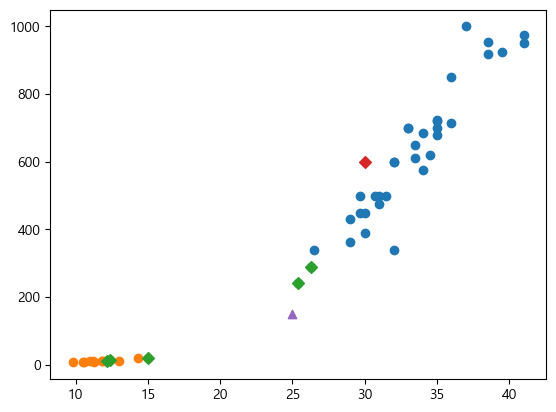

In [53]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1],marker='D')
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')
# plt.xticks([0,1000])

In [47]:
# 25,125의 고기를 측정하시오.
pre = clf.predict([[25,150]])
print("측정 결과 : ",pre)

측정 결과 :  [0]


In [ ]:
# pandas - 평균:mean, 표준편차:std
train_input.mean()
train_input.std()

In [57]:
# 표준점수: 훈련데이터 - 평균 / 표준편차
# numpy: 평균,표준편차
type(train_input)

mean = np.mean(train_input,axis=0)
std = np.std(train_input,axis=0)
std

0     10.468157
1    340.391618
dtype: float64

In [59]:
# train_input,test_input
train_scaled = (train_input - mean) / std
# test_scaled = (test_input - mean) / std

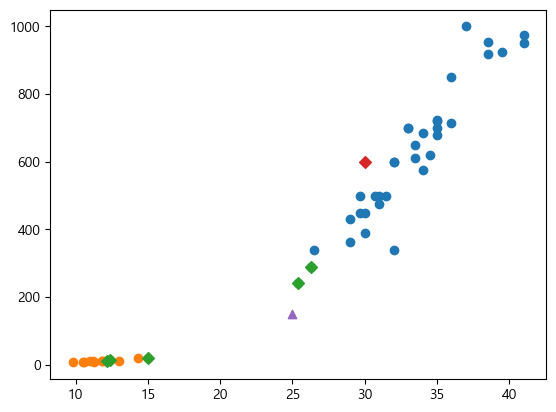

In [61]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1],marker='D')
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')
# plt.xticks([0,1000])

In [62]:
new = ([25,150]-mean)/std
new

0   -0.23537
1   -0.92427
dtype: float64

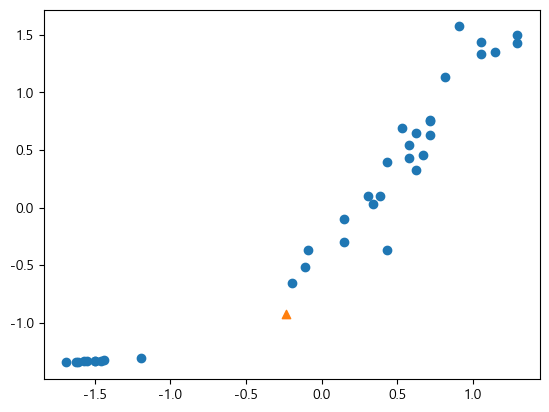

In [63]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(new[0],new[1],marker='^')

In [64]:
clf.fit(train_scaled,train_target)

KNeighborsClassifier()

In [65]:
test_saled = (test_input - mean) / std

In [67]:
score = clf.score(test_saled,test_target)
print("정답률 : ",score)

정답률 :  1.0


In [68]:
predict = clf.predict([new])
print("예측값 : ",predict)

예측값 :  [1]


In [69]:
# knn 예측에 사용한 데이터
distances, indexes = clf.kneighbors([new])
indexes

array([[ 1, 33, 32, 14, 13]], dtype=int64)

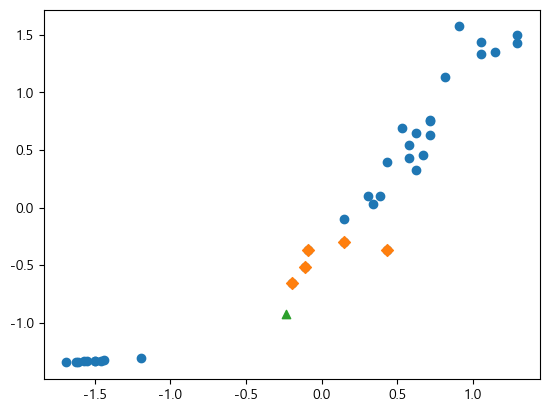

In [71]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(train_scaled.iloc[indexes[0],0],train_scaled.iloc[indexes[0],1],marker='D')
plt.scatter(new[0],new[1],marker='^')